In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec 

from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable

import plotly.graph_objects as go #you will be learning how go and px work with me! 
import plotly.express as px 

import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
plt.rcParams['figure.dpi'] = 140 #high resolution

In [4]:
df = pd.read_csv("kaggle_survey_2020_responses.csv", sep=',')

In [5]:
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.tail()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
20032,126,18-21,Man,Turkey,Some college/university study without earning ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20033,566,55-59,Woman,United Kingdom of Great Britain and Northern I...,Master’s degree,Currently not employed,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
20034,238,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20035,625,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python,NaN,SQL,...,Weights & Biases,NaN,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN
20036,1031,22-24,Man,Pakistan,Master’s degree,Machine Learning Engineer,< 1 years,Python,NaN,NaN,...,Weights & Biases,NaN,NaN,NaN,NaN,NaN,Trains,NaN,NaN,NaN


In [6]:
questions = df.iloc[0, :].T
data = df.iloc[1:, :]

### Vamos começar com uma plotagem das distribuições das idades
Com a plotagem percebemos que a maioria das pessoas que responderam a pesquisa estão no range de 18-29 anos, os três principais.

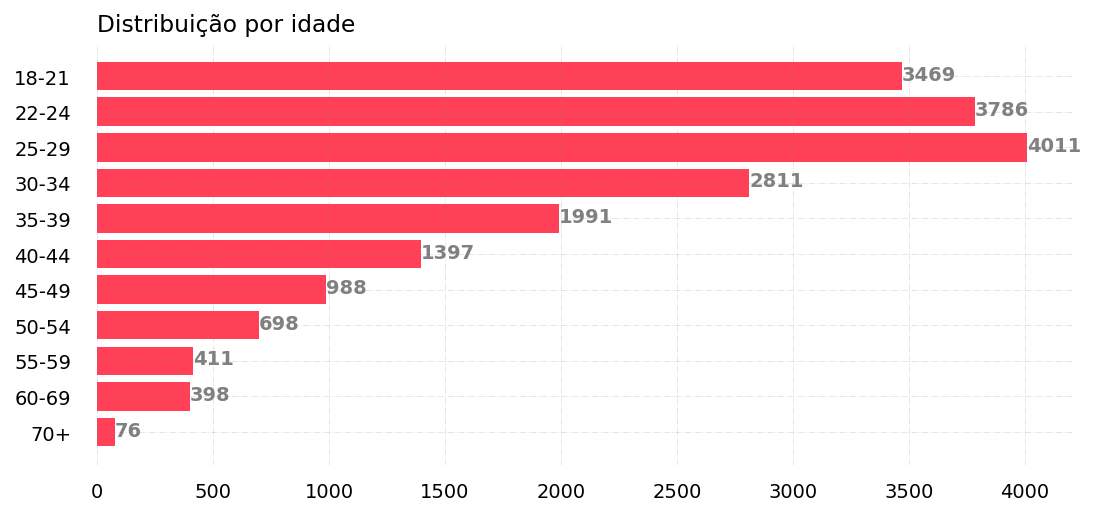

In [7]:
data_q1 = data['Q1'].value_counts().sort_index()

# Figure Size 
fig, ax = plt.subplots(figsize =(9, 4)) 
  
# Horizontal Bar Plot 
ax.barh(data_q1.index, data_q1, color='#ff4057') 
  
# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 
  
# Remove x, y Ticks 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
  
# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 
  
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 
  
# Show top values  
ax.invert_yaxis() 
  
# Add annotation to bars 
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 10, fontweight ='bold', 
             color ='grey') 
  
# Add Plot Title 
ax.set_title('Distribuição por idade', 
             loc ='left', ) 
  
# Add Text watermark 
# fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12, 
#          color ='grey', ha ='right', va ='bottom', 
#          alpha = 0.7) 
  
# Show Plot 
plt.show() 

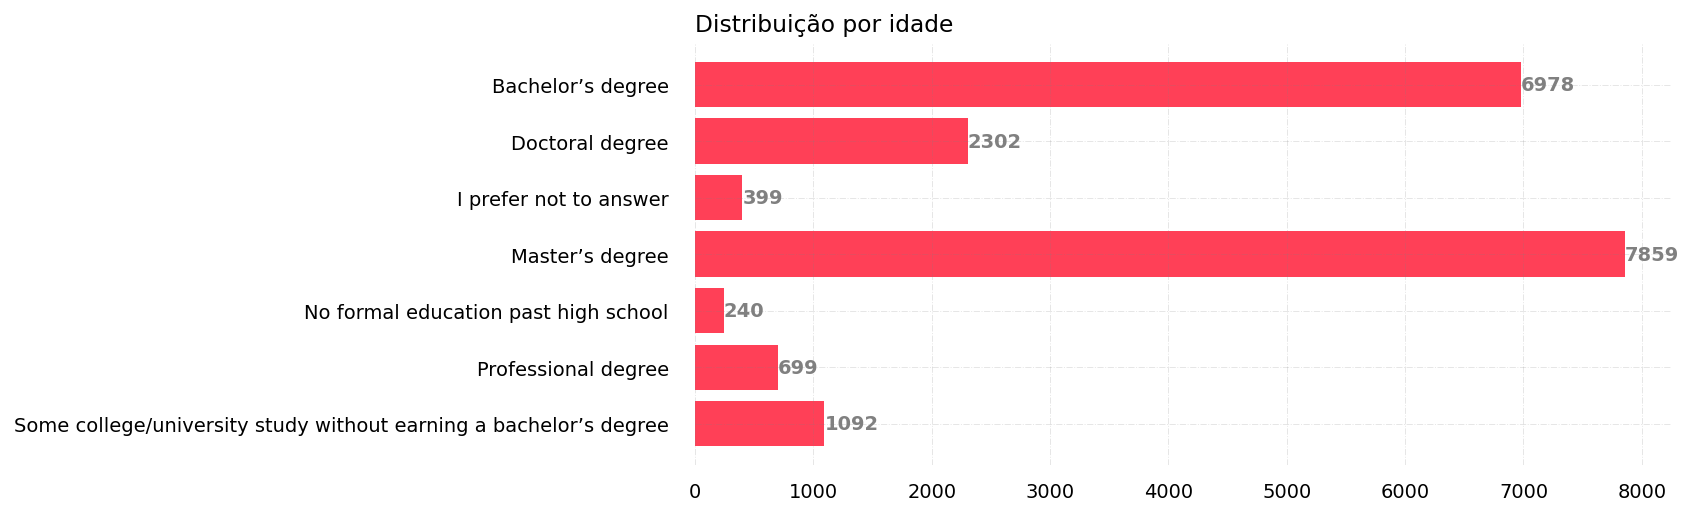

In [10]:
data_q5 = data['Q4'].value_counts().sort_index()

# Figure Size 
fig, ax = plt.subplots(figsize =(9, 4)) 
  
# Horizontal Bar Plot 
ax.barh(data_q5.index, data_q5, color='#ff4057') 
  
# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 
  
# Remove x, y Ticks 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
  
# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 
  
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 
  
# Show top values  
ax.invert_yaxis() 
  
# Add annotation to bars 
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 10, fontweight ='bold', 
             color ='grey') 
  
# Add Plot Title 
ax.set_title('Distribuição por idade', 
             loc ='left', ) 
  
# Add Text watermark 
# fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12, 
#          color ='grey', ha ='right', va ='bottom', 
#          alpha = 0.7) 
  
# Show Plot 
plt.show() 

In [ ]:
# df_columns = pd.DataFrame(df.columns.values.T)
# df_columns
# list_index = list(df.columns.values)
# f=open('themes.txt','w')
# for ele in list_index:
#     f.write(ele+'\n')
# dict_columns = dict(map(lambda t: (t[0], t[1]), enumerate(list_columns)))
# columns_to_get = [1, 2, 3, 6,7,8,9,10,11,12,13,14,15,16, 17, 18, 19, 20, 47, 231, 232, 233, 234, 235, 236, 237, 238 ,239, 240, 241]
# # teste = df.drop(df.columns.difference([columns_to_get]), axis=1) 
# teste = df[df.columns[columns_to_get]]
# teste
# word = teste.columns.values[6].split()
# word[-1]